In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

127705088/170498071 [=====================>........] - ETA: 13s

170500096/170498071 [==============================] - 54s 0us/step


In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [0]:
import numpy as np
a = np.mean(train_set_X, axis=(0))
train_set_X = train_set_X - a
test_set_X = test_set_X - a

In [6]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [7]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [8]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [12]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 50,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
46400/50000 [==========================>...] - ETA: 1s - loss: 1.8936 - acc: 0.3107

50000/50000 [==============================] - 22s 435us/step - loss: 1.8822 - acc: 0.3147 - val_loss: 1.6976 - val_acc: 0.3787
Epoch 2/100
50000/50000 [==============================] - 20s 396us/step - loss: 1.6078 - acc: 0.4181 - val_loss: 1.5263 - val_acc: 0.4503
Epoch 3/100
 9350/50000 [====>.........................] - ETA: 14s - loss: 1.5328 - acc: 0.4509

50000/50000 [==============================] - 20s 397us/step - loss: 1.4865 - acc: 0.4658 - val_loss: 1.4594 - val_acc: 0.4801
Epoch 4/100
50000/50000 [==============================] - 20s 397us/step - loss: 1.4029 - acc: 0.4991 - val_loss: 1.4231 - val_acc: 0.4932
Epoch 5/100
  950/50000 [..............................] - ETA: 18s - loss: 1.3677 - acc: 0.5126

50000/50000 [==============================] - 20s 396us/step - loss: 1.3376 - acc: 0.5232 - val_loss: 1.3535 - val_acc: 0.5180
Epoch 6/100
48500/50000 [============================>.] - ETA: 0s - loss: 1.2829 - acc: 0.5430

50000/50000 [==============================] - 20s 394us/step - loss: 1.2821 - acc: 0.5436 - val_loss: 1.3785 - val_acc: 0.5100
Epoch 7/100
50000/50000 [==============================] - 20s 396us/step - loss: 1.2350 - acc: 0.5643 - val_loss: 1.3037 - val_acc: 0.5359
Epoch 8/100
 9800/50000 [====>.........................] - ETA: 14s - loss: 1.1962 - acc: 0.5808

50000/50000 [==============================] - 20s 393us/step - loss: 1.1968 - acc: 0.5804 - val_loss: 1.2950 - val_acc: 0.5396
Epoch 9/100
50000/50000 [==============================] - 20s 394us/step - loss: 1.1587 - acc: 0.5929 - val_loss: 1.3279 - val_acc: 0.5371
Epoch 10/100
  950/50000 [..............................] - ETA: 18s - loss: 1.0284 - acc: 0.6495

50000/50000 [==============================] - 20s 396us/step - loss: 1.1260 - acc: 0.6056 - val_loss: 1.2202 - val_acc: 0.5730
Epoch 11/100
48350/50000 [============================>.] - ETA: 0s - loss: 1.0971 - acc: 0.6186

50000/50000 [==============================] - 20s 397us/step - loss: 1.0964 - acc: 0.6191 - val_loss: 1.1909 - val_acc: 0.5836
Epoch 12/100
50000/50000 [==============================] - 20s 397us/step - loss: 1.0647 - acc: 0.6285 - val_loss: 1.2343 - val_acc: 0.5742
Epoch 13/100
 9650/50000 [====>.........................] - ETA: 14s - loss: 1.0342 - acc: 0.6417

50000/50000 [==============================] - 20s 397us/step - loss: 1.0398 - acc: 0.6371 - val_loss: 1.1938 - val_acc: 0.5840
Epoch 14/100
50000/50000 [==============================] - 20s 397us/step - loss: 1.0146 - acc: 0.6466 - val_loss: 1.2350 - val_acc: 0.5776
Epoch 15/100
  800/50000 [..............................] - ETA: 18s - loss: 1.0026 - acc: 0.6538

50000/50000 [==============================] - 20s 398us/step - loss: 0.9893 - acc: 0.6561 - val_loss: 1.2196 - val_acc: 0.5819
Epoch 16/100
48150/50000 [===========================>..] - ETA: 0s - loss: 0.9701 - acc: 0.6612

50000/50000 [==============================] - 20s 398us/step - loss: 0.9686 - acc: 0.6619 - val_loss: 1.1653 - val_acc: 0.5957
Epoch 17/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.9431 - acc: 0.6707 - val_loss: 1.1774 - val_acc: 0.6010
Epoch 18/100
 9500/50000 [====>.........................] - ETA: 15s - loss: 0.9189 - acc: 0.6804

50000/50000 [==============================] - 20s 398us/step - loss: 0.9238 - acc: 0.6781 - val_loss: 1.1658 - val_acc: 0.5988
Epoch 19/100
50000/50000 [==============================] - 20s 400us/step - loss: 0.9033 - acc: 0.6884 - val_loss: 1.1292 - val_acc: 0.6141
Epoch 20/100
  800/50000 [..............................] - ETA: 18s - loss: 0.8680 - acc: 0.7050

50000/50000 [==============================] - 20s 395us/step - loss: 0.8835 - acc: 0.6941 - val_loss: 1.1470 - val_acc: 0.6092
Epoch 21/100
48150/50000 [===========================>..] - ETA: 0s - loss: 0.8647 - acc: 0.7001

50000/50000 [==============================] - 20s 401us/step - loss: 0.8641 - acc: 0.7003 - val_loss: 1.1357 - val_acc: 0.6130
Epoch 22/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.8449 - acc: 0.7069 - val_loss: 1.1691 - val_acc: 0.6068
Epoch 23/100
 9500/50000 [====>.........................] - ETA: 15s - loss: 0.8127 - acc: 0.7208

50000/50000 [==============================] - 20s 398us/step - loss: 0.8247 - acc: 0.7152 - val_loss: 1.1498 - val_acc: 0.6148
Epoch 24/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.8086 - acc: 0.7201 - val_loss: 1.1303 - val_acc: 0.6160
Epoch 25/100
  800/50000 [..............................] - ETA: 18s - loss: 0.7076 - acc: 0.7550

50000/50000 [==============================] - 20s 397us/step - loss: 0.7889 - acc: 0.7291 - val_loss: 1.1561 - val_acc: 0.6175
Epoch 26/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.7721 - acc: 0.7313

50000/50000 [==============================] - 20s 396us/step - loss: 0.7721 - acc: 0.7314 - val_loss: 1.1461 - val_acc: 0.6152
Epoch 27/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.7548 - acc: 0.7383 - val_loss: 1.1274 - val_acc: 0.6204
Epoch 28/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.7214 - acc: 0.7515

50000/50000 [==============================] - 20s 397us/step - loss: 0.7376 - acc: 0.7462 - val_loss: 1.1237 - val_acc: 0.6260
Epoch 29/100
50000/50000 [==============================] - 20s 397us/step - loss: 0.7175 - acc: 0.7529 - val_loss: 1.1583 - val_acc: 0.6203
Epoch 30/100
  800/50000 [..............................] - ETA: 18s - loss: 0.7508 - acc: 0.7288

50000/50000 [==============================] - 20s 398us/step - loss: 0.7053 - acc: 0.7585 - val_loss: 1.2134 - val_acc: 0.6038
Epoch 31/100
48150/50000 [===========================>..] - ETA: 0s - loss: 0.6866 - acc: 0.7632

50000/50000 [==============================] - 20s 396us/step - loss: 0.6867 - acc: 0.7630 - val_loss: 1.1822 - val_acc: 0.6220
Epoch 32/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.6691 - acc: 0.7682 - val_loss: 1.2180 - val_acc: 0.6166
Epoch 33/100
 9500/50000 [====>.........................] - ETA: 15s - loss: 0.6372 - acc: 0.7820

50000/50000 [==============================] - 20s 397us/step - loss: 0.6541 - acc: 0.7753 - val_loss: 1.1546 - val_acc: 0.6265
Epoch 34/100
50000/50000 [==============================] - 20s 401us/step - loss: 0.6390 - acc: 0.7809 - val_loss: 1.1639 - val_acc: 0.6275
Epoch 35/100
  800/50000 [..............................] - ETA: 18s - loss: 0.6185 - acc: 0.7937

50000/50000 [==============================] - 20s 396us/step - loss: 0.6241 - acc: 0.7863 - val_loss: 1.1871 - val_acc: 0.6244
Epoch 36/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.6062 - acc: 0.7922

50000/50000 [==============================] - 20s 397us/step - loss: 0.6072 - acc: 0.7914 - val_loss: 1.2443 - val_acc: 0.6139
Epoch 37/100
50000/50000 [==============================] - 20s 397us/step - loss: 0.5886 - acc: 0.7980 - val_loss: 1.2495 - val_acc: 0.6161
Epoch 38/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.5713 - acc: 0.8035

50000/50000 [==============================] - 20s 395us/step - loss: 0.5789 - acc: 0.8011 - val_loss: 1.1962 - val_acc: 0.6300
Epoch 39/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.5611 - acc: 0.8079 - val_loss: 1.2230 - val_acc: 0.6302
Epoch 40/100
  800/50000 [..............................] - ETA: 18s - loss: 0.5337 - acc: 0.8262

50000/50000 [==============================] - 20s 396us/step - loss: 0.5449 - acc: 0.8121 - val_loss: 1.2477 - val_acc: 0.6282
Epoch 41/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.5327 - acc: 0.8174

50000/50000 [==============================] - 20s 395us/step - loss: 0.5330 - acc: 0.8176 - val_loss: 1.2358 - val_acc: 0.6250
Epoch 42/100
50000/50000 [==============================] - 20s 398us/step - loss: 0.5163 - acc: 0.8246 - val_loss: 1.2835 - val_acc: 0.6225
Epoch 43/100
 9650/50000 [====>.........................] - ETA: 14s - loss: 0.4885 - acc: 0.8365

50000/50000 [==============================] - 20s 396us/step - loss: 0.5020 - acc: 0.8263 - val_loss: 1.2998 - val_acc: 0.6159
Epoch 44/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.4829 - acc: 0.8350 - val_loss: 1.3160 - val_acc: 0.6183
Epoch 45/100
  800/50000 [..............................] - ETA: 18s - loss: 0.4619 - acc: 0.8425

50000/50000 [==============================] - 20s 396us/step - loss: 0.4743 - acc: 0.8376 - val_loss: 1.2925 - val_acc: 0.6258
Epoch 46/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.4542 - acc: 0.8447

50000/50000 [==============================] - 20s 398us/step - loss: 0.4557 - acc: 0.8442 - val_loss: 1.3500 - val_acc: 0.6244
Epoch 47/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.4402 - acc: 0.8503 - val_loss: 1.3255 - val_acc: 0.6204
Epoch 48/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.4048 - acc: 0.8656

50000/50000 [==============================] - 20s 398us/step - loss: 0.4292 - acc: 0.8541 - val_loss: 1.4209 - val_acc: 0.6138
Epoch 49/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.4159 - acc: 0.8576 - val_loss: 1.5012 - val_acc: 0.6056
Epoch 50/100
  800/50000 [..............................] - ETA: 18s - loss: 0.3899 - acc: 0.8687

50000/50000 [==============================] - 20s 398us/step - loss: 0.4026 - acc: 0.8629 - val_loss: 1.4003 - val_acc: 0.6251
Epoch 51/100
48150/50000 [===========================>..] - ETA: 0s - loss: 0.3857 - acc: 0.8697

50000/50000 [==============================] - 20s 404us/step - loss: 0.3869 - acc: 0.8690 - val_loss: 1.4615 - val_acc: 0.6256
Epoch 52/100
50000/50000 [==============================] - 20s 403us/step - loss: 0.3764 - acc: 0.8723 - val_loss: 1.4421 - val_acc: 0.6180
Epoch 53/100
 9500/50000 [====>.........................] - ETA: 14s - loss: 0.3386 - acc: 0.8893

50000/50000 [==============================] - 20s 399us/step - loss: 0.3604 - acc: 0.8795 - val_loss: 1.4850 - val_acc: 0.6165
Epoch 54/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.3489 - acc: 0.8816 - val_loss: 1.5235 - val_acc: 0.6213
Epoch 55/100
  800/50000 [..............................] - ETA: 18s - loss: 0.2870 - acc: 0.8937

50000/50000 [==============================] - 20s 398us/step - loss: 0.3376 - acc: 0.8852 - val_loss: 1.5237 - val_acc: 0.6208
Epoch 56/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.3282 - acc: 0.8887

50000/50000 [==============================] - 20s 403us/step - loss: 0.3271 - acc: 0.8890 - val_loss: 1.5826 - val_acc: 0.6107
Epoch 57/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.3140 - acc: 0.8941 - val_loss: 1.5488 - val_acc: 0.6224
Epoch 58/100
 9650/50000 [====>.........................] - ETA: 14s - loss: 0.2558 - acc: 0.9206

50000/50000 [==============================] - 20s 395us/step - loss: 0.2963 - acc: 0.9017 - val_loss: 1.6240 - val_acc: 0.6129
Epoch 59/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.2837 - acc: 0.9050 - val_loss: 1.6607 - val_acc: 0.6214
Epoch 60/100
  800/50000 [..............................] - ETA: 18s - loss: 0.2651 - acc: 0.9137

50000/50000 [==============================] - 20s 397us/step - loss: 0.2772 - acc: 0.9072 - val_loss: 1.7084 - val_acc: 0.6091
Epoch 61/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.2648 - acc: 0.9112

50000/50000 [==============================] - 20s 395us/step - loss: 0.2646 - acc: 0.9112 - val_loss: 1.8055 - val_acc: 0.5971
Epoch 62/100
50000/50000 [==============================] - 20s 393us/step - loss: 0.2569 - acc: 0.9149 - val_loss: 1.9364 - val_acc: 0.5890
Epoch 63/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.2179 - acc: 0.9290

50000/50000 [==============================] - 20s 393us/step - loss: 0.2462 - acc: 0.9182 - val_loss: 1.7174 - val_acc: 0.6189
Epoch 64/100
50000/50000 [==============================] - 20s 397us/step - loss: 0.2278 - acc: 0.9254 - val_loss: 1.8169 - val_acc: 0.6130
Epoch 65/100
  800/50000 [..............................] - ETA: 18s - loss: 0.2081 - acc: 0.9375

50000/50000 [==============================] - 20s 393us/step - loss: 0.2257 - acc: 0.9254 - val_loss: 1.8168 - val_acc: 0.6153
Epoch 66/100
48150/50000 [===========================>..] - ETA: 0s - loss: 0.2062 - acc: 0.9345

50000/50000 [==============================] - 20s 393us/step - loss: 0.2076 - acc: 0.9337 - val_loss: 1.8334 - val_acc: 0.6169
Epoch 67/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.1961 - acc: 0.9378 - val_loss: 1.8509 - val_acc: 0.6215
Epoch 68/100
 9500/50000 [====>.........................] - ETA: 14s - loss: 0.1955 - acc: 0.9381

50000/50000 [==============================] - 20s 396us/step - loss: 0.1992 - acc: 0.9350 - val_loss: 1.9495 - val_acc: 0.6101
Epoch 69/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.1820 - acc: 0.9407 - val_loss: 1.9259 - val_acc: 0.6209
Epoch 70/100
  800/50000 [..............................] - ETA: 17s - loss: 0.1599 - acc: 0.9538

50000/50000 [==============================] - 20s 401us/step - loss: 0.1636 - acc: 0.9493 - val_loss: 2.0068 - val_acc: 0.6122
Epoch 71/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.1698 - acc: 0.9446

50000/50000 [==============================] - 21s 418us/step - loss: 0.1700 - acc: 0.9446 - val_loss: 2.0091 - val_acc: 0.6173
Epoch 72/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.1513 - acc: 0.9522 - val_loss: 2.0714 - val_acc: 0.6087
Epoch 73/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.1102 - acc: 0.9698

50000/50000 [==============================] - 21s 417us/step - loss: 0.1421 - acc: 0.9562 - val_loss: 2.1251 - val_acc: 0.6060
Epoch 74/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.1411 - acc: 0.9567 - val_loss: 2.1325 - val_acc: 0.6150
Epoch 75/100
  500/50000 [..............................] - ETA: 19s - loss: 0.0799 - acc: 0.9880

50000/50000 [==============================] - 20s 405us/step - loss: 0.1279 - acc: 0.9609 - val_loss: 2.1677 - val_acc: 0.6163
Epoch 76/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.1272 - acc: 0.9627

50000/50000 [==============================] - 20s 394us/step - loss: 0.1302 - acc: 0.9616 - val_loss: 2.1785 - val_acc: 0.6134
Epoch 77/100
50000/50000 [==============================] - 20s 395us/step - loss: 0.1113 - acc: 0.9676 - val_loss: 2.2018 - val_acc: 0.6171
Epoch 78/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.0864 - acc: 0.9795

50000/50000 [==============================] - 20s 405us/step - loss: 0.1117 - acc: 0.9696 - val_loss: 2.4523 - val_acc: 0.5954
Epoch 79/100
50000/50000 [==============================] - 21s 411us/step - loss: 0.1067 - acc: 0.9697 - val_loss: 2.3002 - val_acc: 0.6116
Epoch 80/100
  800/50000 [..............................] - ETA: 19s - loss: 0.0939 - acc: 0.9738

50000/50000 [==============================] - 21s 417us/step - loss: 0.0945 - acc: 0.9750 - val_loss: 2.3916 - val_acc: 0.6016
Epoch 81/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.0713 - acc: 0.9834

50000/50000 [==============================] - 21s 420us/step - loss: 0.0717 - acc: 0.9833 - val_loss: 2.4121 - val_acc: 0.6098
Epoch 82/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.0700 - acc: 0.9822 - val_loss: 2.3687 - val_acc: 0.6194
Epoch 83/100
 9650/50000 [====>.........................] - ETA: 15s - loss: 0.0471 - acc: 0.9918

50000/50000 [==============================] - 21s 419us/step - loss: 0.0517 - acc: 0.9905 - val_loss: 2.4470 - val_acc: 0.6178
Epoch 84/100
50000/50000 [==============================] - 20s 399us/step - loss: 0.0911 - acc: 0.9766 - val_loss: 2.3869 - val_acc: 0.6156
Epoch 85/100
  800/50000 [..............................] - ETA: 18s - loss: 0.0533 - acc: 0.9950

50000/50000 [==============================] - 20s 397us/step - loss: 0.0828 - acc: 0.9789 - val_loss: 2.5643 - val_acc: 0.6045
Epoch 86/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.0470 - acc: 0.9913

50000/50000 [==============================] - 20s 395us/step - loss: 0.0468 - acc: 0.9914 - val_loss: 2.5029 - val_acc: 0.6184
Epoch 87/100
50000/50000 [==============================] - 20s 399us/step - loss: 0.0952 - acc: 0.9820 - val_loss: 2.3978 - val_acc: 0.6153
Epoch 88/100
 9500/50000 [====>.........................] - ETA: 15s - loss: 0.0572 - acc: 0.9868

50000/50000 [==============================] - 20s 395us/step - loss: 0.0589 - acc: 0.9877 - val_loss: 2.5507 - val_acc: 0.6113
Epoch 89/100
50000/50000 [==============================] - 20s 398us/step - loss: 0.0334 - acc: 0.9955 - val_loss: 2.6158 - val_acc: 0.6183
Epoch 90/100
  800/50000 [..............................] - ETA: 19s - loss: 0.0242 - acc: 0.9975

50000/50000 [==============================] - 21s 422us/step - loss: 0.0226 - acc: 0.9983 - val_loss: 2.6316 - val_acc: 0.6205
Epoch 91/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.0186 - acc: 0.9988

50000/50000 [==============================] - 21s 417us/step - loss: 0.0185 - acc: 0.9988 - val_loss: 2.6700 - val_acc: 0.6194
Epoch 92/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.0161 - acc: 0.9992 - val_loss: 2.7147 - val_acc: 0.6196
Epoch 93/100
 9450/50000 [====>.........................] - ETA: 15s - loss: 0.0133 - acc: 0.9995

50000/50000 [==============================] - 21s 418us/step - loss: 0.0144 - acc: 0.9994 - val_loss: 2.7399 - val_acc: 0.6187
Epoch 94/100
50000/50000 [==============================] - 20s 410us/step - loss: 0.0129 - acc: 0.9994 - val_loss: 2.7685 - val_acc: 0.6220
Epoch 95/100
  650/50000 [..............................] - ETA: 18s - loss: 0.0086 - acc: 1.0000

50000/50000 [==============================] - 20s 398us/step - loss: 0.0117 - acc: 0.9996 - val_loss: 2.8016 - val_acc: 0.6181
Epoch 96/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.0105 - acc: 0.9996

50000/50000 [==============================] - 20s 396us/step - loss: 0.0105 - acc: 0.9997 - val_loss: 2.8183 - val_acc: 0.6203
Epoch 97/100
50000/50000 [==============================] - 20s 400us/step - loss: 0.0097 - acc: 0.9997 - val_loss: 2.8464 - val_acc: 0.6214
Epoch 98/100
 9500/50000 [====>.........................] - ETA: 15s - loss: 0.0083 - acc: 0.9999

50000/50000 [==============================] - 20s 397us/step - loss: 0.0091 - acc: 0.9998 - val_loss: 2.8633 - val_acc: 0.6228
Epoch 99/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.0083 - acc: 0.9999 - val_loss: 2.8923 - val_acc: 0.6217
Epoch 100/100
  800/50000 [..............................] - ETA: 18s - loss: 0.0084 - acc: 1.0000

50000/50000 [==============================] - 20s 397us/step - loss: 0.0078 - acc: 0.9999 - val_loss: 2.9034 - val_acc: 0.6196


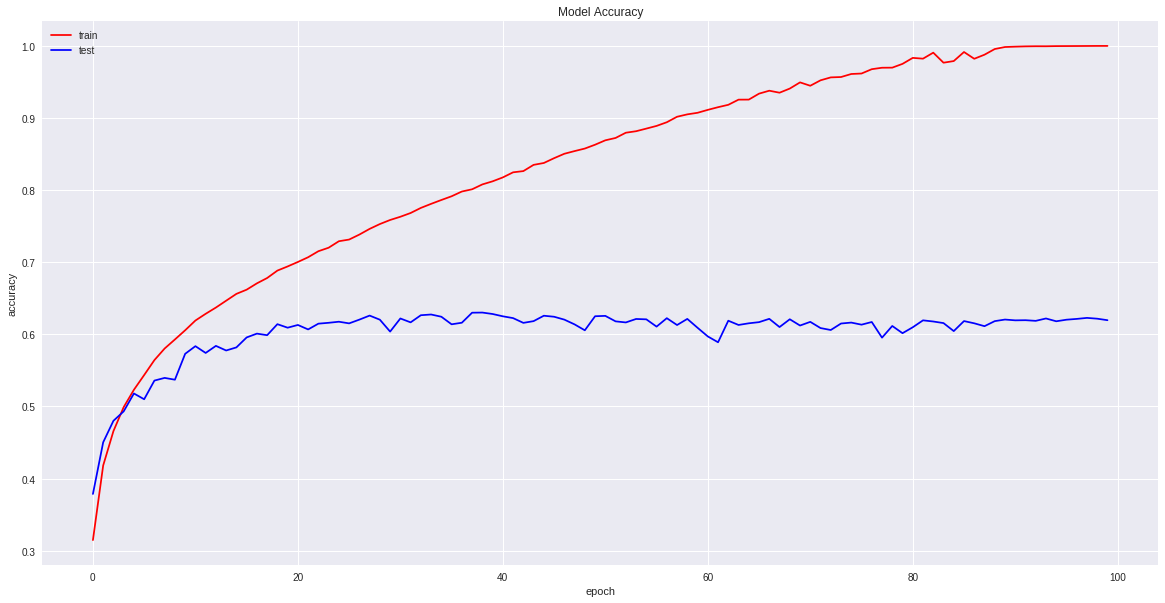

In [13]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


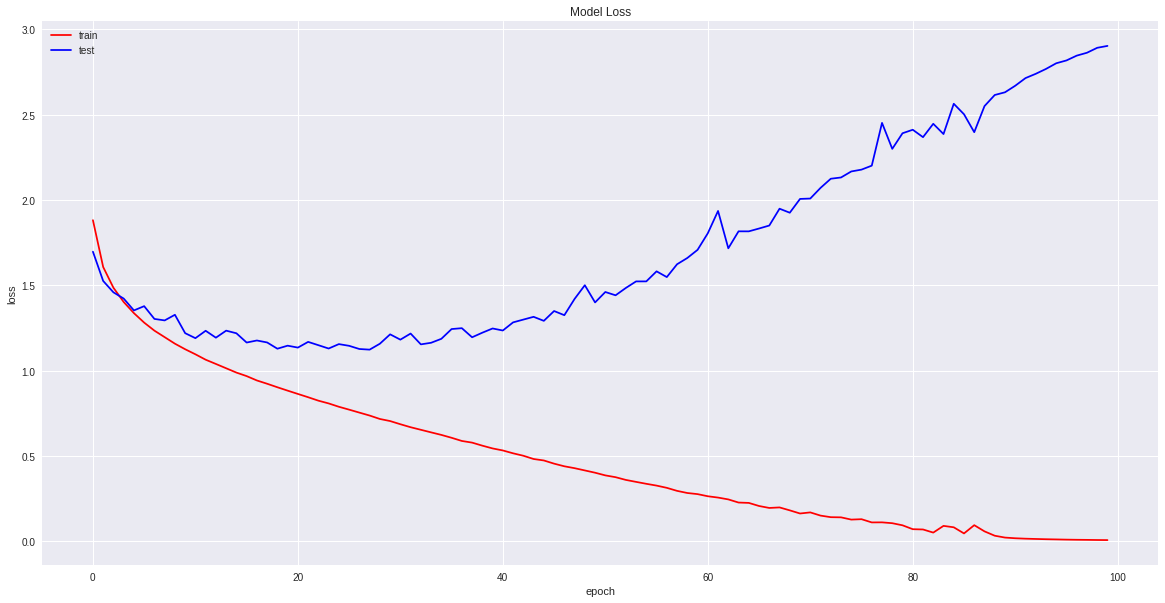

In [14]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        2.9G        162M        250M        9.6G        9.3G
Swap:            0B          0B          0B
